## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

In [ ]:
#Tensorflow 설치하기

* 데이터 프레임 관련 라이브러리

In [ ]:
#라이브러리 불러오기

### **나.  학습데이터 불러오기**

### **다.  데이터 전처리**

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [1]:
# train_test_split 사용


### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [ ]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [ ]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


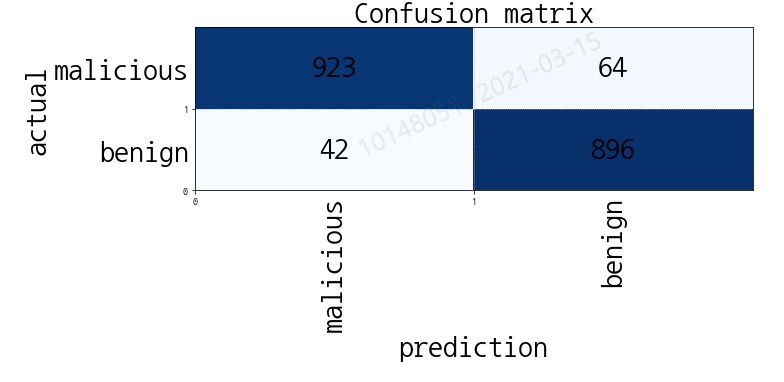

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

In [24]:
# 1. import



In [25]:
# 2.선언 




In [26]:
# 3. fit(), 학습



In [27]:
# 4. predict(), 예측





In [20]:
# train 및 val 데이터 정확도 확인 




In [18]:
# Test 데이터 결과 Confusion Matrix 확인



In [19]:
# Feature(특징)별 가중치 확인

